## Importing Necessary Libraries 

In [16]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import time
import matplotlib.pyplot as plt

## Loading the Dataset 

In [19]:
df_train = pd.read_csv('train_data.csv')
df_test = pd.read_csv('test_data.csv')

X_train = df_train.drop(columns = 'left')
y_train = df_train['left']

X_test = df_test.drop(columns = 'left')
y_test = df_test['left']

X_train = X_train.values 
y_train = y_train.values 
X_test = X_test.values 
y_test = y_test.values 

## Defining the Model


In [45]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.output = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.sigmoid(self.hidden(x))
        x = self.sigmoid(self.output(x))
        return x


def train_model(X_train, y_train, X_test, y_test, hidden_size, learning_rate, epochs):
    input_size = X_train.shape[1]
    output_size = len(torch.unique(torch.tensor(y_train)))

    model = MLP(input_size, hidden_size, output_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    # Forward and Backward Prop
    start_time = time.time()
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(torch.tensor(X_train, dtype=torch.float32))
        loss = criterion(outputs, torch.tensor(y_train, dtype=torch.long))
        loss.backward()
        optimizer.step()

    end_time = time.time()

    # Evaluation
    model.eval()
    with torch.no_grad():
        train_pred = model(torch.tensor(X_train, dtype=torch.float32)).argmax(dim=1).numpy()
        test_pred = model(torch.tensor(X_test, dtype=torch.float32)).argmax(dim=1).numpy()
    
    #Accuracy Scores
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)

    return train_accuracy, test_accuracy, end_time - start_time, loss

## Training and Testing 

In [46]:
hidden_sizes = [5, 10, 15, 20]
learning_rates = [0.001, 0.01, 0.1, 0.5, 0.6]
epochs = 1000

# Collect results
train_times = []
test_accuracies = []

for hidden_size in hidden_sizes:
    for learning_rate in learning_rates:
        print(f'\nTraining model with hidden size: {hidden_size}, learning rate: {learning_rate}')
        train_acc, test_acc, train_time, loss = train_model(X_train, y_train, X_test, y_test, hidden_size, learning_rate, epochs)
        train_times.append(train_time)
        test_accuracies.append(test_acc)
        print(f'Training Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}, Training Time: {train_time:.2f} seconds')


Training model with hidden size: 5, learning rate: 0.001
Training Accuracy: 0.7919, Test Accuracy: 0.7240, Training Time: 3.26 seconds

Training model with hidden size: 5, learning rate: 0.01
Training Accuracy: 0.8798, Test Accuracy: 0.8438, Training Time: 3.24 seconds

Training model with hidden size: 5, learning rate: 0.1
Training Accuracy: 0.5000, Test Accuracy: 0.2380, Training Time: 4.23 seconds

Training model with hidden size: 5, learning rate: 0.5
Training Accuracy: 0.5000, Test Accuracy: 0.7620, Training Time: 4.64 seconds

Training model with hidden size: 5, learning rate: 0.6
Training Accuracy: 0.5000, Test Accuracy: 0.2380, Training Time: 4.70 seconds

Training model with hidden size: 10, learning rate: 0.001
Training Accuracy: 0.8068, Test Accuracy: 0.7378, Training Time: 5.04 seconds

Training model with hidden size: 10, learning rate: 0.01
Training Accuracy: 0.8990, Test Accuracy: 0.8744, Training Time: 5.26 seconds

Training model with hidden size: 10, learning rate: 0

## Plotting Graphs

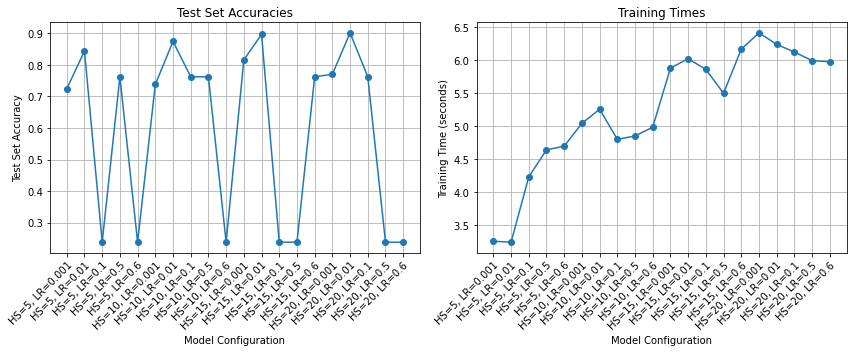

In [48]:
# Plot results
plt.figure(figsize=(12, 5))

# Plot test set accuracies
plt.subplot(1, 2, 1)
plt.plot(test_accuracies, marker='o')
plt.xlabel('Model Configuration')
plt.ylabel('Test Set Accuracy')
plt.title('Test Set Accuracies')
plt.xticks(range(len(test_accuracies)), [f'HS={hs}, LR={lr}' for hs in hidden_sizes for lr in learning_rates], rotation=45, ha='right', rotation_mode='anchor')
plt.grid(True)


# Plot training times
plt.subplot(1, 2, 2)
plt.plot(train_times, marker='o')
plt.xlabel('Model Configuration')
plt.ylabel('Training Time (seconds)')
plt.title('Training Times')
plt.xticks(range(len(train_times)), [f'HS={hs}, LR={lr}' for hs in hidden_sizes for lr in learning_rates], rotation=45, ha='right', rotation_mode='anchor')
plt.grid(True)

plt.tight_layout()
plt.show()